In [1]:
!pip install -q ultralytics
!pip install -q IPython
import ultralytics
from IPython import display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/PCB_Data

/content/drive/MyDrive/PCB_Data


In [10]:
!yolo task=detect mode=train model=yolov8s.pt data=dataset.yaml epochs=10 plots=True

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

In [12]:
!yolo task=detect mode=val model=/content/drive/MyDrive/PCB_Data/runs/detect/train4/weights/best.pt data=dataset.yaml

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/PCB_Data/data/val/labels.cache... 115 images, 0 backgrounds, 0 corrupt: 100% 115/115 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:17<00:00,  2.23s/it]
                   all        115        487      0.415      0.298      0.276      0.118
                    Mh         23         98      0.261      0.847      0.728      0.346
                    Mb         23        101      0.443      0.099      0.117     0.0406
                    Oc         23         90      0.345      0.122      0.149     0.0645
                    Sh         23         99        0.4      0.303       0.25     0.0869
                    Sp         23         99      0.628      0.119      0.135     0.0542
Speed: 0.8ms preprocess, 21.3ms inf

In [14]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/PCB_Data/runs/detect/train4/weights/best.pt source=/content/drive/MyDrive/PCB_Data/data/val/images conf=0.30

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_missing_hole_03.jpg: 352x640 3 Mhs, 76.4ms
image 2/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_missing_hole_05.jpg: 352x640 3 Mhs, 10.7ms
image 3/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_missing_hole_06.jpg: 352x640 2 Mhs, 10.7ms
image 4/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_missing_hole_07.jpg: 352x640 1 Mh, 10.7ms
image 5/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_missing_hole_08.jpg: 352x640 2 Mhs, 10.7ms
image 6/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_missing_hole_18.jpg: 352x640 1 Mh, 10.7ms
image 7/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_mouse_bite_01.jpg: 352x640 (no detections), 10.7ms
image 8/115 /content/drive/MyDrive/PCB_Data/data/val/images/01_mouse_bite_05.jpg: 3

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


In [33]:
df = pd.read_csv('/content/drive/MyDrive/PCB_Data/runs/detect/train4/results.csv')



In [34]:

df.columns = df.columns.str.replace('/', '_')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0                     epoch  10 non-null     int64  
 1            train_box_loss  10 non-null     float64
 2            train_cls_loss  10 non-null     float64
 3            train_dfl_loss  10 non-null     float64
 4      metrics_precision(B)  10 non-null     float64
 5         metrics_recall(B)  10 non-null     float64
 6          metrics_mAP50(B)  10 non-null     float64
 7       metrics_mAP50-95(B)  10 non-null     float64
 8              val_box_loss  10 non-null     float64
 9              val_cls_loss  10 non-null     float64
 10             val_dfl_loss  10 non-null     float64
 11                   lr_pg0  10 non-null     float64
 12                   lr_pg1  10 non-null     float64
 13                   lr_pg2  10 non-null     float64
dtypes: float64(13), int64(1)
memo

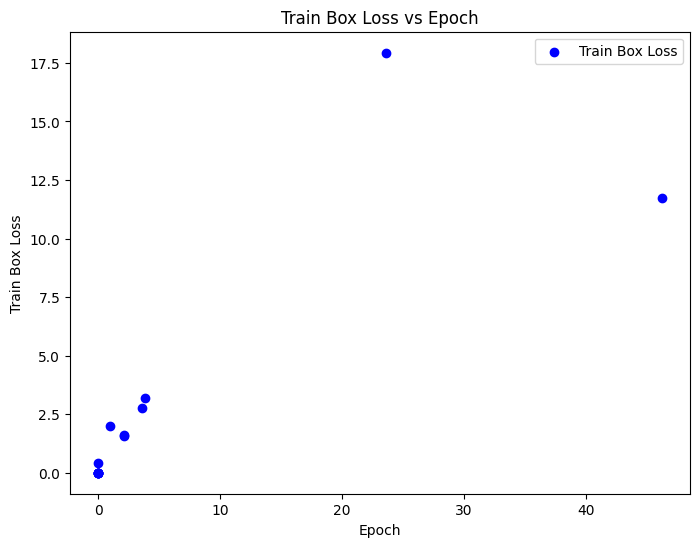

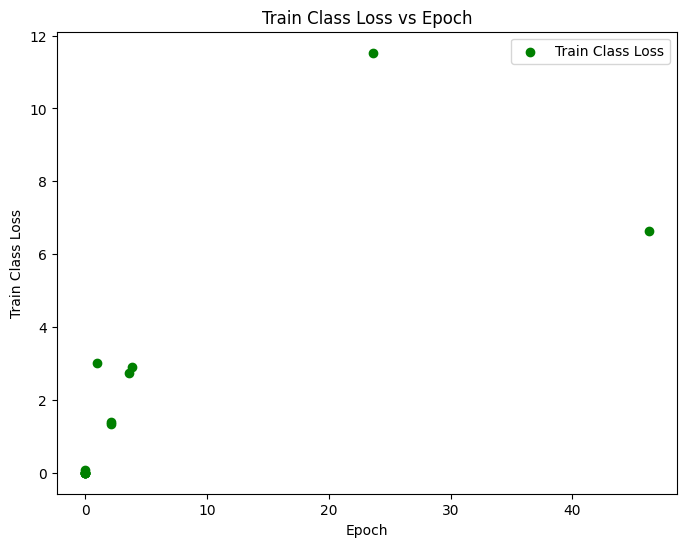

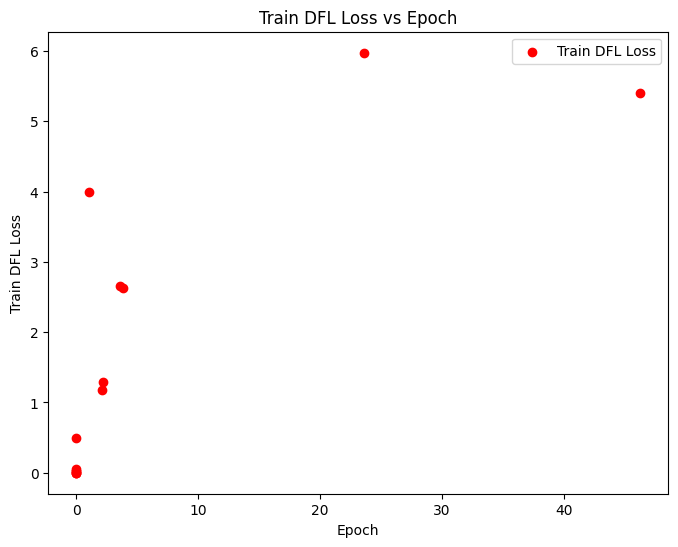

In [44]:
epoch = df.iloc[0]
train_box_loss = df.iloc[1]
train_cls_loss = df.iloc[2]
train_dfl_loss = df.iloc[3]


plt.figure(figsize=(8, 6))
plt.scatter(epoch, train_box_loss, color='blue', label='Train Box Loss')
plt.title('Train Box Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Train Box Loss')
plt.legend()

plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(epoch, train_cls_loss, color='blue', label='Train Class Loss')
plt.title('Train Class Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Train Class Loss')
plt.legend()

plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(epoch, train_dfl_loss, color='blue', label='Train DFL Loss')
plt.title('Train DFL Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Train DFL Loss')
plt.legend()

plt.show()

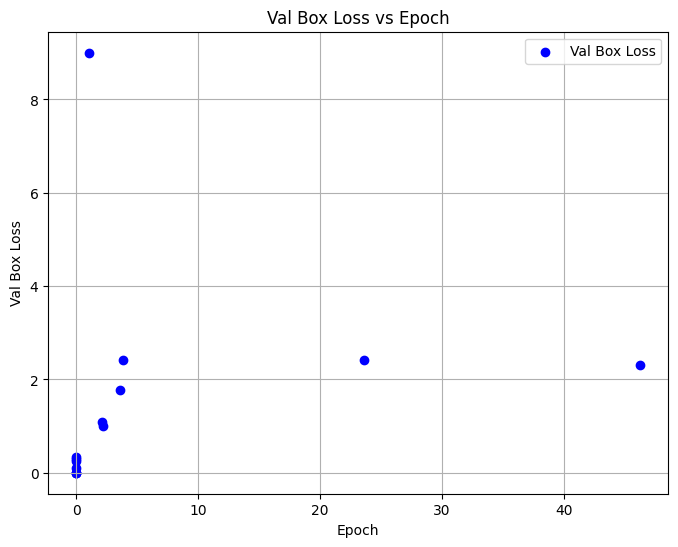

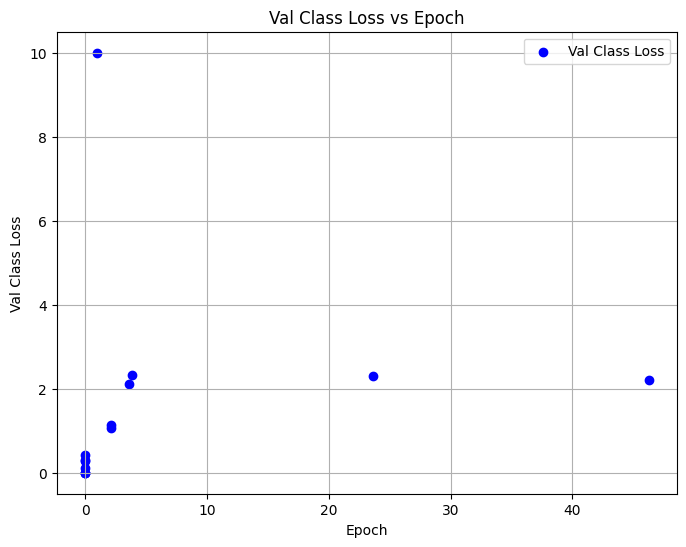

In [47]:
val_box_loss = df.iloc[8]
val_cls_loss = df.iloc[9]

plt.figure(figsize=(8, 6))
plt.scatter(epoch, val_box_loss, color='blue', label='Val Box Loss')
plt.title('Val Box Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Val Box Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(epoch, val_cls_loss, color='blue', label='Val Class Loss')
plt.title('Val Class Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Val Class Loss')
plt.legend()
plt.grid(True)
plt.show()

